### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

data = boston.data
feature_names = boston.feature_names

Создайте датафреймы X и y из этих данных.

In [5]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
target = boston.target
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

Масштабируйте данные с помощью StandardScaler.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=feature_names
)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [18]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=feature_names
)
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912


Постройте модель TSNE на тренировочный данных с параметрами: 
n_components=2, learning_rate=250, random_state=42.


In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

Постройте диаграмму рассеяния на этих данных.

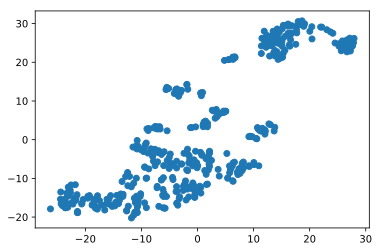

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


#### Предполагаю, что в тексте задания опечатка и надо использовать уже масштабируемые данные X_train_scaled

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


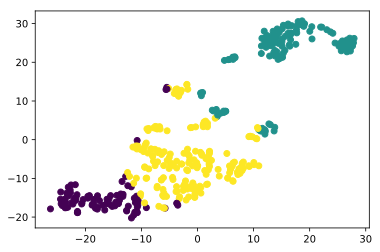

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

Вычислите средние значения price и CRIM в разных кластерах.

In [29]:
y_train.mean()

price    22.796535
dtype: float64

In [31]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [32]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [33]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [34]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [35]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [36]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [38]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

2    45
1    35
0    22
dtype: int64

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [39]:
y_test.mean()

price    21.488235
dtype: float64

In [41]:
y_test[labels_test==0].mean()

price    28.413636
dtype: float64

In [42]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [43]:
y_test[labels_test==2].mean()

price    22.031111
dtype: float64

In [44]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.07985181818181818

In [45]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [46]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.2845831111111111